# Problem 1:

# Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('test.csv')
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


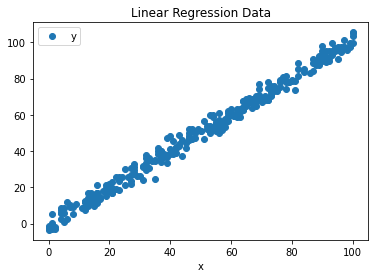

In [3]:
data.plot(x='x', y='y', style='o')
plt.title('Linear Regression Data')
plt.show()

In [4]:
#Preaparing the Data
#Dividing into "attributes" and "labels"
X= data.iloc[:, :-1].values
Y= data.iloc[:, 1].values

#splitting data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [5]:
#Training the Algorithm
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.intercept_)
print(reg.coef_)

-0.5333242119059278
[1.0144497]


In [6]:
#Predictions
Y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

,Actual,Predicted
0,68.488207,67.434805
1,30.494129,26.856818
2,95.149072,96.853847
3,103.526616,100.911645
4,28.156685,27.871267
5,68.946998,65.405906
6,40.007096,37.001315
7,48.098431,40.044664
8,54.081706,52.218060
9,87.457216,89.752699


In [7]:
#Evalutation of the Algorithm 
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Square Error: ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error:  2.2723148666042317
Mean Square Error:  8.388794074847828
Root Mean Squared Error:  2.8963414983126263


Looking at the root mean squared error and mean value of percentages of all students, our algorithm did a decent job.
Kaggle Link : https://www.kaggle.com/code/janhavighogare/linear-regression-j

# TASK 2

In [8]:
# Polynomial Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
d = pd.read_csv('diamonds.csv')
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
# DATA ANALYSIS
d.info()
d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
# Min values of x,y,and z = 0 don't make sense. Hence, we drop them
d = d.loc[(d[['x','y','z']]!=0).all(axis=1)]
d.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


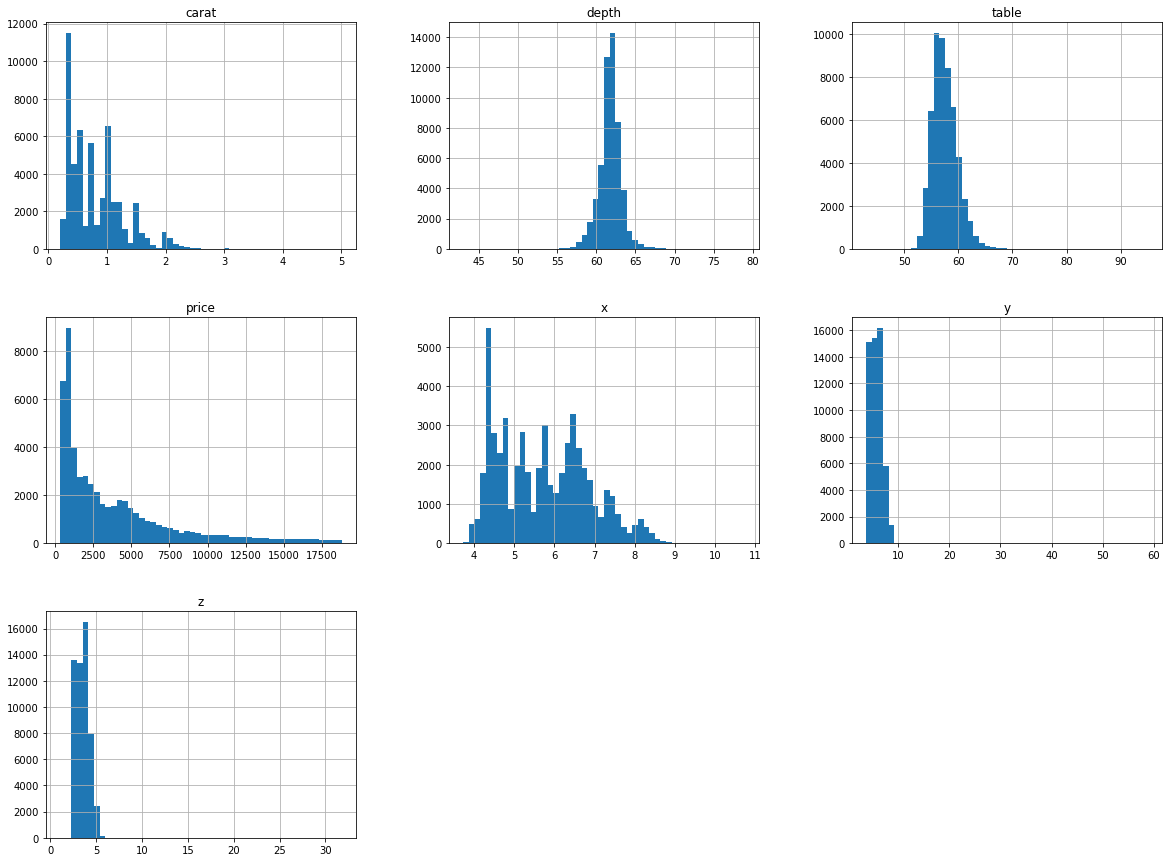

<AxesSubplot:>

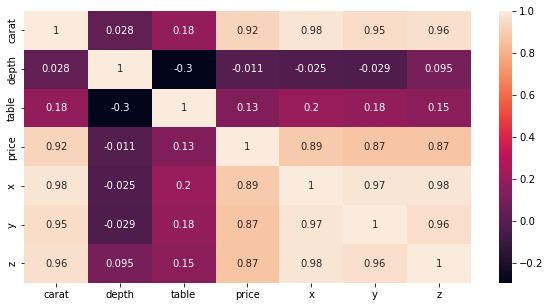

In [12]:
#Preliminary data exploration

# Plotting Graphs
d.hist(bins=50, figsize=(20,15))
plt.show()

# Identifying the correlation
plt.figure(figsize = (10,5))
sb.heatmap(d.corr(), annot = True)

In [13]:
print('cut', d['cut'].unique())
print('color', d['color'].unique())
print('clarity', d['clarity'].unique())

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


We can conclude that x,y,z have quite a strong correlation with carat and price variable but not so much with depth and table as indicated by the color scheme.

In [36]:
val_percent = 0.20
batch_size = 16


In [38]:
data_one_hot_encoding = pd.get_dummies(d)
data_one_hot_encoding.head()


,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [39]:
#selected input cols to predict the diamond price
# Converting the dataframe columns to list
input_cols = data_one_hot_encoding.columns.values.tolist() 
input_cols.remove('price')
input_cols.remove('depth')

#Price is the target variable
output_col = ['price']

In [40]:
def dataframe_to_arrays(d):
    # Make a copy of the original dataframe
    dataframe1 = d.copy(deep=True)
    # Extract input & outupts as numpy arrays
    inputs_array = d[input_cols].to_numpy() #converting dataframes to numpy arrays
    targets_array = d[output_col].to_numpy()
    return inputs_array, targets_array

inputs_array, targets_array = dataframe_to_arrays(data_one_hot_encoding)

inputs_array.shape , targets_array.shape

((53920, 25), (53920, 1))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_array, targets_array, test_size=0.33, random_state=42)


In [42]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression().fit(X_train, y_train)

In [43]:
#Training score
model.score(X_train, y_train)

0.9187861605360313

In [44]:
#Test score
model.score(X_test, y_test)

0.9187543064435191

Kaggle link: https://www.kaggle.com/code/janhavighogare/polynomialreg

# Problem 2:

# Task 1

In [14]:
import pandas as pd
train = pd.read_csv("93201943110413967pendigits.tra", sep=",", header = None)
test = pd.read_csv("-2846160376108234339pendigits.tes", sep=",", header = None)
train.columns =['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'Res']
test.columns =['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'Res']
print("Training Dataset :\n", train.head())
print("Testing Dataset :\n", test.head())

Training Dataset :
    x1   y1  x2   y2   x3   y3   x4   y4  x5  y5   x6  y6   x7  y7   x8  y8  \
0  47  100  27   81   57   37   26    0   0  23   56  53  100  90   40  98   
1   0   89  27  100   42   75   29   45  15  15   37   0   69   2  100   6   
2   0   57  31   68   72   90  100  100  76  75   50  51   28  25   16   0   
3   0  100   7   92    5   68   19   45  86  34  100  45   74  23   67   0   
4   0   67  49   83  100  100   81   80  60  60   40  40   33  20   47   0   

   Res  
0    8  
1    2  
2    1  
3    4  
4    1  
Testing Dataset :
    x1   y1  x2   y2  x3  y3   x4  y4   x5  y5   x6  y6   x7   y7   x8   y8  \
0  88   92   2   99  16  66   94  37   70   0    0  24   42   65  100  100   
1  80  100  18   98  60  66  100  29   42   0    0  23   42   61   56   98   
2   0   94   9   57  20  19    7   0   20  36   70  68  100  100   18   92   
3  95   82  71  100  27  77   77  73  100  80   93  42   56   13    0    0   
4  68  100   6   88  47  75   87  82   85  56  1

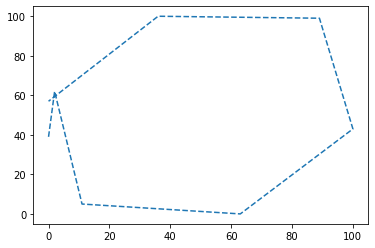

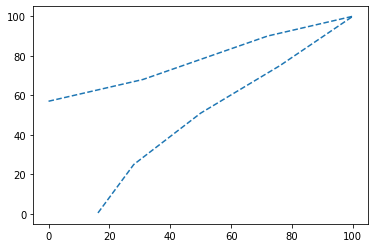

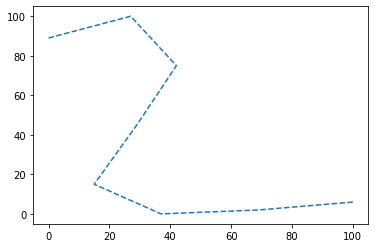

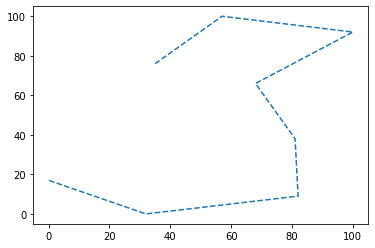

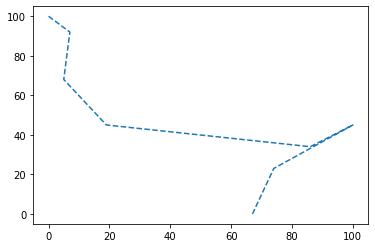

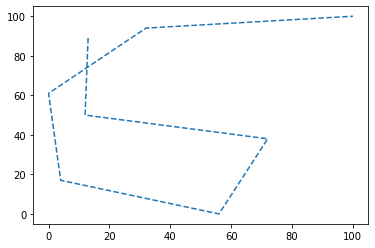

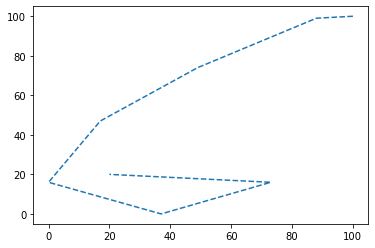

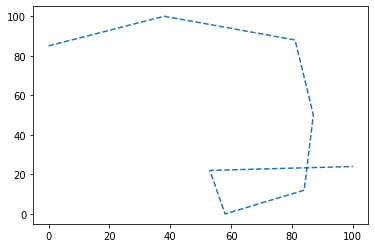

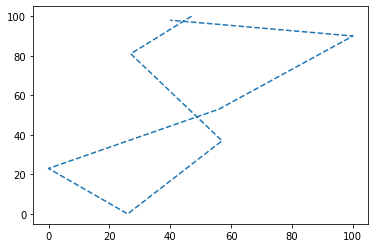

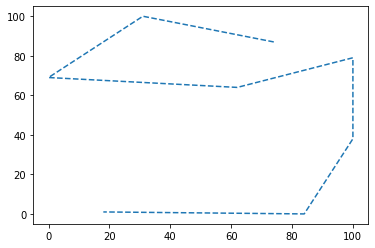

In [15]:
import matplotlib.pyplot as plt

X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

def draw(d,n):
    X=[d.iloc[n,x] for x in range(0,15,2)]
    Y=[d.iloc[n,x] for x in range(1,16,2)]
    plt.plot(X,Y, linestyle='dashed')
    plt.show()
    
for i in range(10):
    x=(y_train==i).idxmax()
    draw(X_train,x)

# Task 2

In [16]:
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

   x1   y1  x2   y2   x3   y3   x4   y4  x5  y5   x6  y6   x7  y7   x8  y8
0  47  100  27   81   57   37   26    0   0  23   56  53  100  90   40  98
1   0   89  27  100   42   75   29   45  15  15   37   0   69   2  100   6
2   0   57  31   68   72   90  100  100  76  75   50  51   28  25   16   0
3   0  100   7   92    5   68   19   45  86  34  100  45   74  23   67   0
4   0   67  49   83  100  100   81   80  60  60   40  40   33  20   47   0
0    8
1    2
2    1
3    4
4    1
Name: Res, dtype: int64
   x1   y1  x2   y2  x3  y3   x4  y4   x5  y5   x6  y6   x7   y7   x8   y8
0  88   92   2   99  16  66   94  37   70   0    0  24   42   65  100  100
1  80  100  18   98  60  66  100  29   42   0    0  23   42   61   56   98
2   0   94   9   57  20  19    7   0   20  36   70  68  100  100   18   92
3  95   82  71  100  27  77   77  73  100  80   93  42   56   13    0    0
4  68  100   6   88  47  75   87  82   85  56  100  29   75    6    0    0
0    8
1    8
2    8
3    9
4    9
Name: 

In [17]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

# Training the model on data
model = LogisticRegression(solver='liblinear', random_state=0, max_iter=1000000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000000, random_state=0, solver='liblinear')

In [18]:
model.score(X_train, y_train)

0.9471577261809447

In [19]:
model.score(X_test, y_test)

0.8905088622069754

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model.predict(X_test))

0.8905088622069754

In [21]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, model.predict(X_train))
print(cm)

[[739   0   0   0   4   3   2   0  27   5]
 [  0 698  21  14   3  24   1   7   0  11]
 [  0   8 771   0   0   1   0   0   0   0]
 [  0   4   1 713   1   0   0   0   0   0]
 [  0   0   0   0 771   1   1   1   0   6]
 [  0   3   0   5   0 621   0   7  10  74]
 [  0   0   0   0   5   1 708   0   6   0]
 [  0   3   1   3   0   7   0 757   4   3]
 [ 15   1   0   0   0  28   0   2 658  15]
 [  5  11   1   5   2  21   0   0  12 662]]


Text(0.5, 1.0, 'Accuracy Score: 0.8905088622069754')

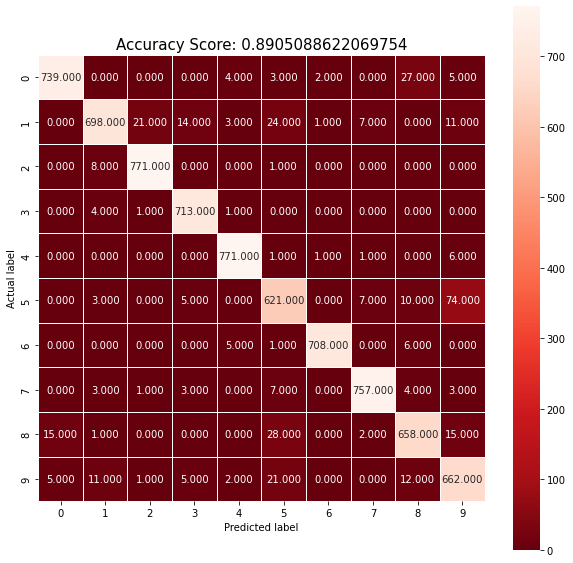

In [23]:
# Testing the accuracy using confusion matrix 
import seaborn as sb
plt.figure(figsize=(10,10))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# Task 3

In [59]:
import scipy.stats
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

class KNN:
    def __init__(self, k):
        self.k = k
        
    def load(self, dataset):
        [self.X,self.y]=dataset
        
    def distance(self, p1, p2):
        # calculate L2 distance
        return (p1-p2)**2
    
    def score(self,X_test,y_test):
        return accuracy_score(y_test,self.predict(X_test))

    def predict(self, test):
        # predict the class of the test_point
        y_pred=[]
        for test_point in test.to_numpy():
            distances = np.linalg.norm(self.X - test_point, axis=1)
            nearest_neighbors_id = distances.argsort()[:self.k]
            nearest_neighbors_y=self.y[nearest_neighbors_id]
            #print(scipy.stats.mode(nearest_neighbors_y).mode[0])
            y_pred.append(scipy.stats.mode(nearest_neighbors_y).mode[0])
        return y_pred

In [60]:
model=KNN(1)
model.load([X_train, y_train])
model.score(X_test, y_test)

0.9774156660949114

# Task 4

In [ ]:
train_score = []
test_score = []
for i in range(1, 1000):
    model = KNN(i)
    model.load([X_train, y_train])
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))
    
plt.ylabel('Accuracy')
plt.xlabel('k')
all_sample_title = 'Determining Optimal Values of Hyperparameters'
plt.title(all_sample_title, size = 15)
plt.plot(train_score, linestyle='dashed', label='Training')
plt.plot(test_score, label='Testing')
